### Training of modified U-Net for Optic Disc on RIM-ONE v3 database (cross-validation fold #0).

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt

from model_rimone import *
from process_images_rimone import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


In [2]:
images, cups, disc_locations = get_images()

In [3]:
gen = data_generator(images, cups, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)
batch[0].shape

(1, 128, 128, 3)

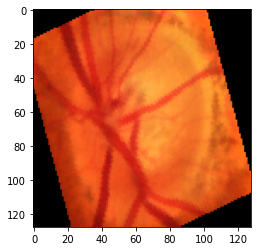

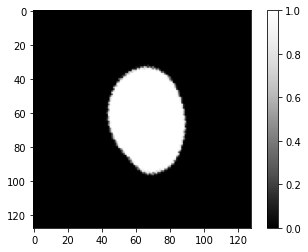

In [4]:
fig = plt.imshow(batch[0][0])
plt.show()
plt.imshow(batch[1][0], cmap=plt.cm.Greys_r); plt.colorbar(); plt.show()

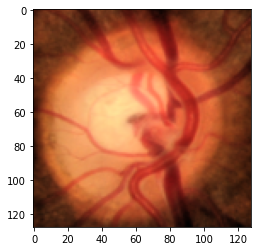

(32, 128, 128, 3) (32, 128, 128, 1)


In [5]:
X_valid, Y_valid = next(data_generator(images, cups, disc_locations, train_or_test='test', batch_size=100, stationary=True))
plt.imshow(X_valid[0]); plt.show()
print(X_valid.shape, Y_valid.shape)

In [6]:
epochs = 2# NUM_EPOCHS
spe = SPE
img_size = IMG_SIZE

model = create_compile_model(img_size)
history_cup = train_cup(images, 
                     cups, 
                     disc_locations, 
                     'cup_color_rimone', 
                     model, epochs, X_valid, Y_valid, img_size, spe)

Epoch 1/2
99/99 [==============================] - 38s 340ms/step - loss: 1.3305 - mean_IOU_gpu: 0.0471 - dice_metric: 0.0881 - val_loss: 1.2098 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 2/2
99/99 [==============================] - 32s 327ms/step - loss: 1.2882 - mean_IOU_gpu: 0.0017 - dice_metric: 0.0034 - val_loss: 1.1066 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00


image #5


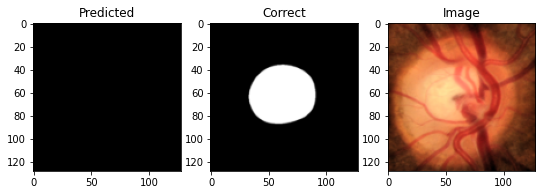

IOU: 0.0
Dice: 0.0
image #11


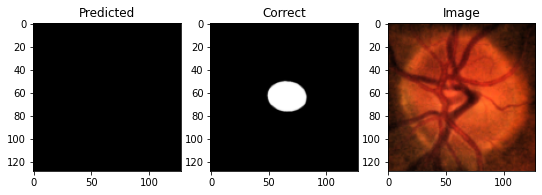

IOU: 0.0
Dice: 0.0
image #14


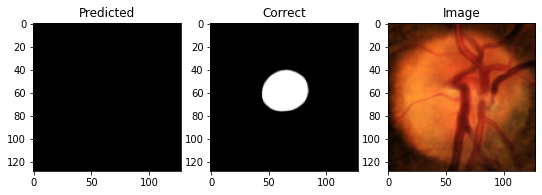

IOU: 0.0
Dice: 0.0
image #16


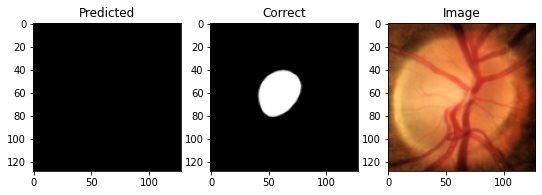

IOU: 0.0
Dice: 0.0
image #19


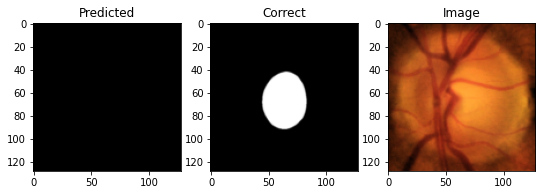

IOU: 0.0
Dice: 0.0
image #29


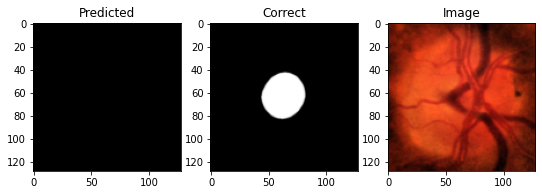

IOU: 0.0
Dice: 0.0
image #31


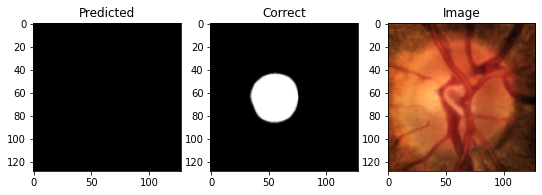

IOU: 0.0
Dice: 0.0
image #35


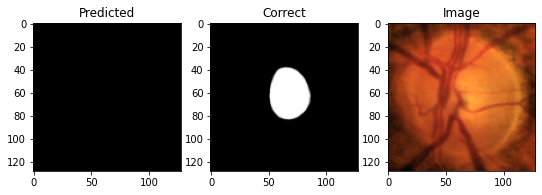

IOU: 0.0
Dice: 0.0
image #40


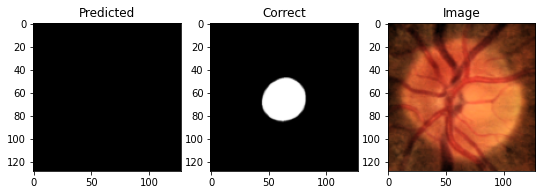

IOU: 0.0
Dice: 0.0
image #42


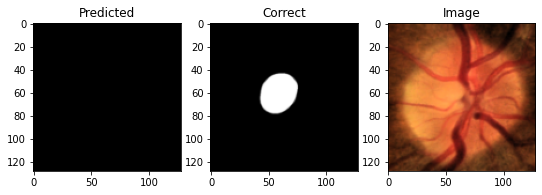

IOU: 0.0
Dice: 0.0
image #44


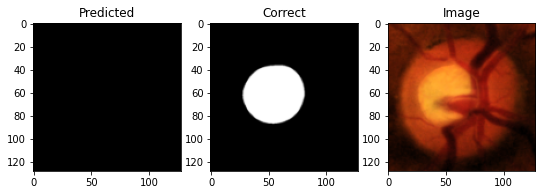

IOU: 0.0
Dice: 0.0
image #51


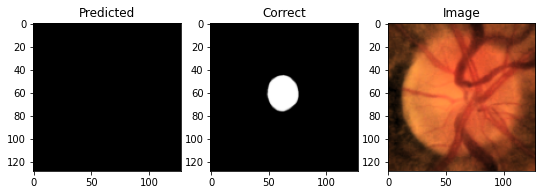

IOU: 0.0
Dice: 0.0
image #54


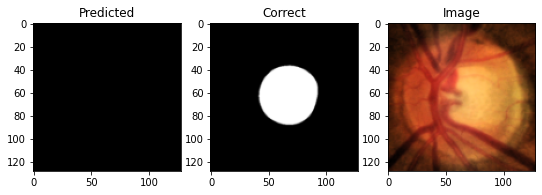

IOU: 0.0
Dice: 0.0
image #59


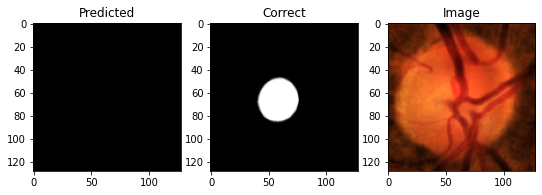

IOU: 0.0
Dice: 0.0
image #66


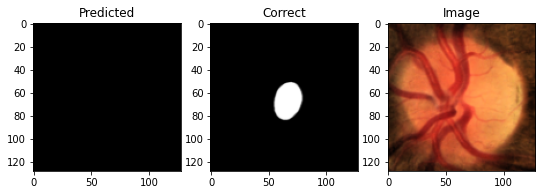

IOU: 0.0
Dice: 0.0
image #73


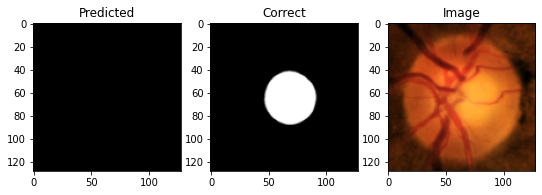

IOU: 0.0
Dice: 0.0
image #81


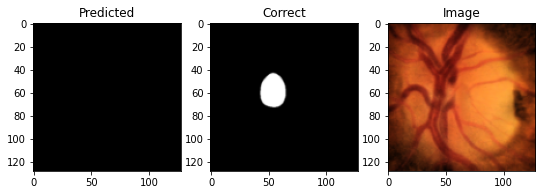

IOU: 0.0
Dice: 0.0
image #84


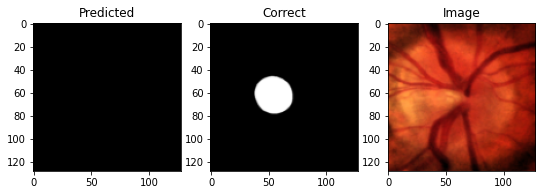

IOU: 0.0
Dice: 0.0
image #89


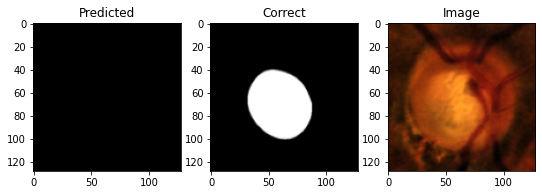

IOU: 0.0
Dice: 0.0
image #90


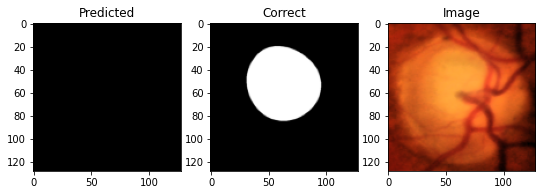

IOU: 0.0
Dice: 0.0
image #91


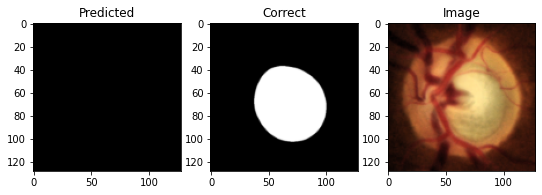

IOU: 0.0
Dice: 0.0
image #93


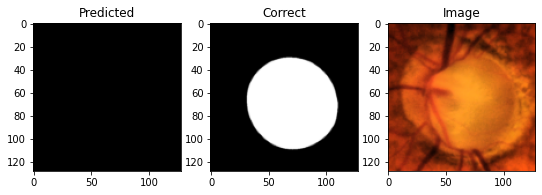

IOU: 0.0
Dice: 0.0
image #94


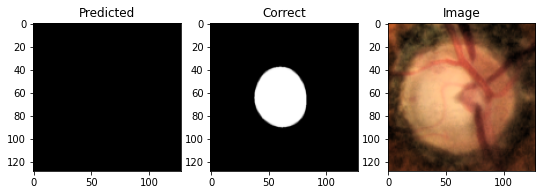

IOU: 0.0
Dice: 0.0
image #97


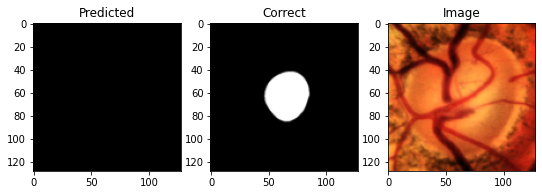

IOU: 0.0
Dice: 0.0
image #100


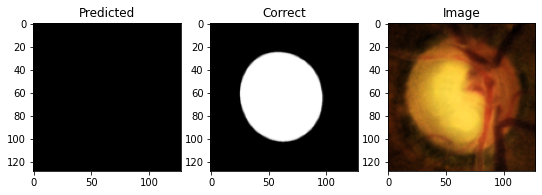

IOU: 0.0
Dice: 0.0
image #103


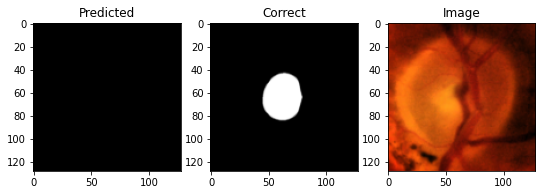

IOU: 0.0
Dice: 0.0
image #105


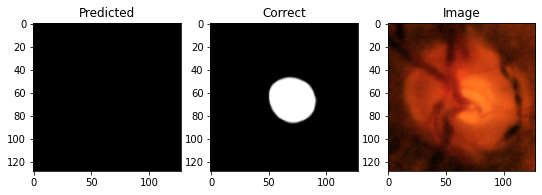

IOU: 0.0
Dice: 0.0
image #108


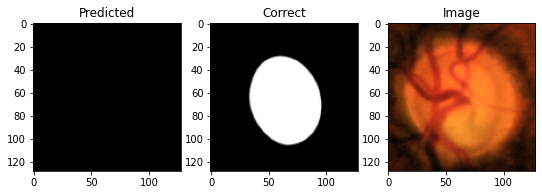

IOU: 0.0
Dice: 0.0
image #127


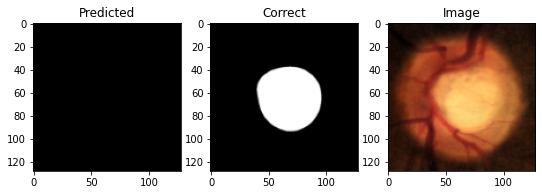

IOU: 0.0
Dice: 0.0
image #143


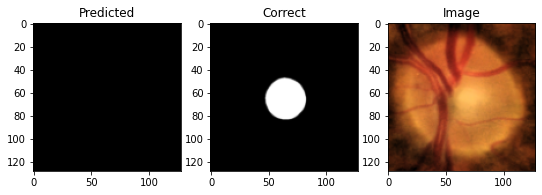

IOU: 0.0
Dice: 0.0
image #145


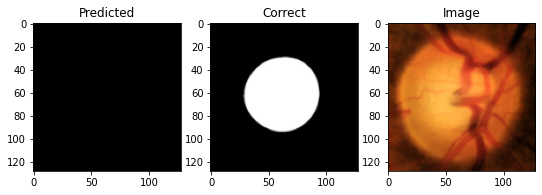

IOU: 0.0
Dice: 0.0
image #153


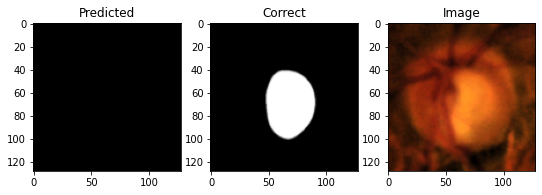

IOU: 0.0
Dice: 0.0


In [7]:
pred_iou, pred_dice, pred_cup = predict(images, X_valid, Y_valid, model, img_size)

In [8]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.0
0.0


In [9]:
print(np.std(pred_iou))
print(np.std(pred_dice))

0.0
0.0


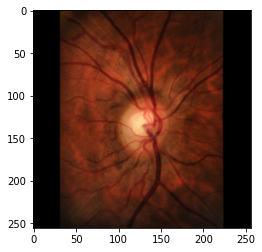

(32, 256, 256, 3) (32, 256, 256, 1)


In [11]:
images = h5f['RIM-ONE v3/256 px/images']
discs = h5f['RIM-ONE v3/256 px/disc']

X_valid, Z_valid = next(data_generator_disc(images, discs, train_or_test='test', batch_size=100, stationary=True))
plt.imshow(X_valid[0]); plt.show()
print(X_valid.shape, Z_valid.shape)

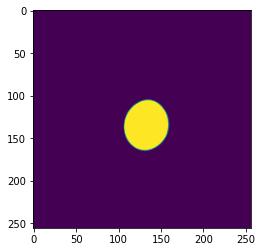

In [12]:
plt.imshow(Z_valid[0]); plt.show()

In [13]:
img_size = 256

model_disc = create_compile_model(img_size)
history_disc = train_disc(images, 
                     discs, 
                     'disc_color_rimone', 
                     model_disc, epochs, X_valid, Z_valid, img_size, spe)

Epoch 1/2
99/99 [==============================] - 123s 1s/step - loss: 2.0693 - mean_IOU_gpu: 0.0884 - dice_metric: 0.1568 - val_loss: 1.8675 - val_mean_IOU_gpu: 0.2343 - val_dice_metric: 0.3339
Epoch 2/2
99/99 [==============================] - 76s 766ms/step - loss: 1.5462 - mean_IOU_gpu: 0.3544 - dice_metric: 0.4718 - val_loss: 1.0100 - val_mean_IOU_gpu: 0.5139 - val_dice_metric: 0.6647


image #5


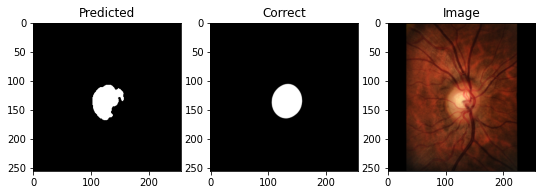

IOU: 0.6875695586204529
Dice: 0.8205937918368625
image #11


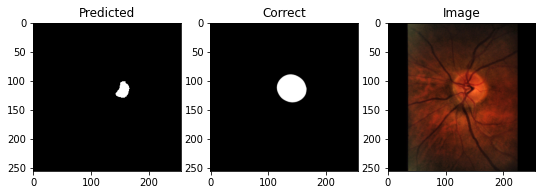

IOU: 0.23145712912082672
Dice: 0.38142168933309467
image #14


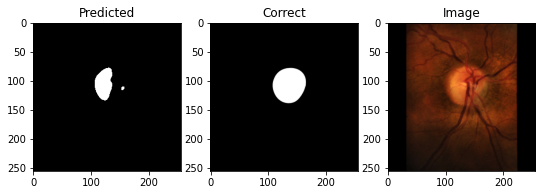

IOU: 0.4204384684562683
Dice: 0.5992897923316658
image #16


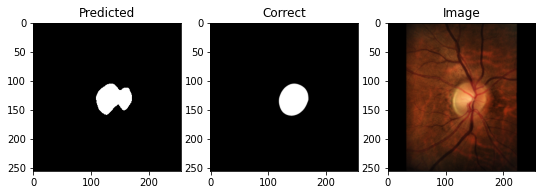

IOU: 0.6410827040672302
Dice: 0.7878265710033082
image #19


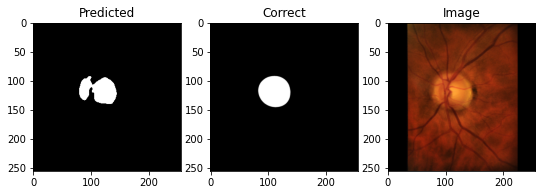

IOU: 0.6223674416542053
Dice: 0.7729683150877854
image #29


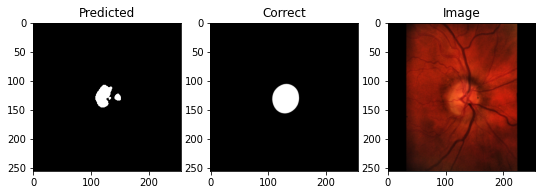

IOU: 0.4674685597419739
Dice: 0.6436022375270374
image #31


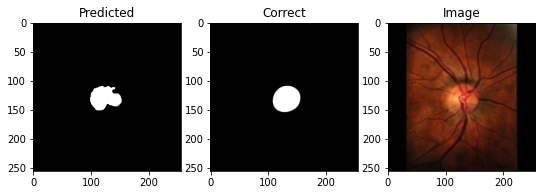

IOU: 0.577235758304596
Dice: 0.739215433417239
image #35


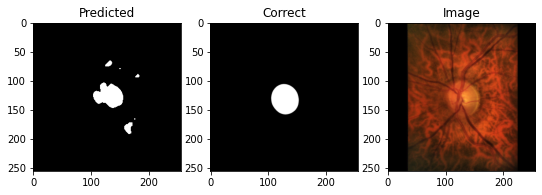

IOU: 0.5649999976158142
Dice: 0.7292648589976648
image #40


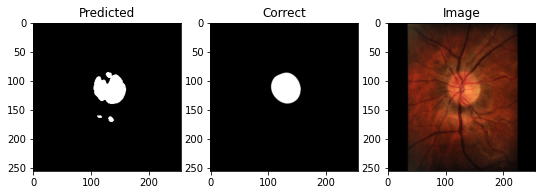

IOU: 0.7783716917037964
Dice: 0.8818785900601341
image #42


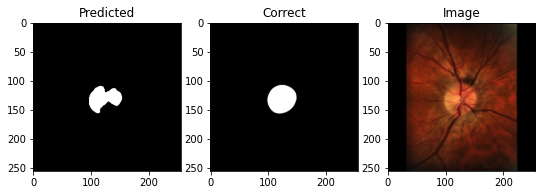

IOU: 0.6655675768852234
Dice: 0.8077255162200894
image #44


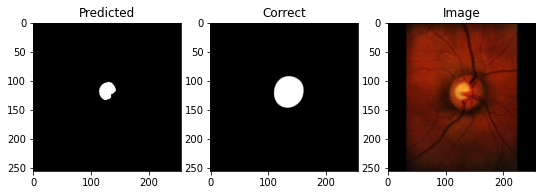

IOU: 0.2878718674182892
Dice: 0.45328023881289226
image #51


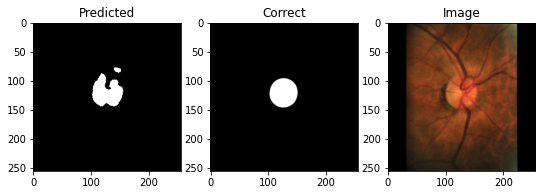

IOU: 0.7275086641311646
Dice: 0.8487745029827511
image #54


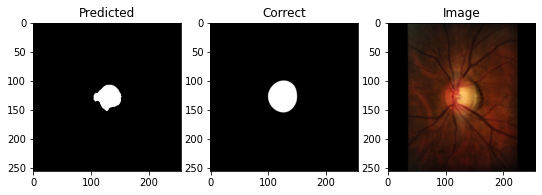

IOU: 0.6216339468955994
Dice: 0.7759083939822494
image #59


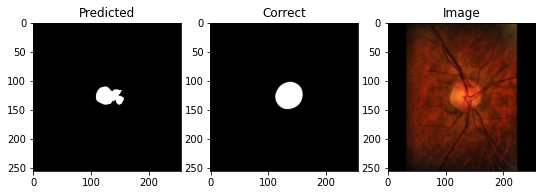

IOU: 0.5351648330688477
Dice: 0.7062915953497799
image #66


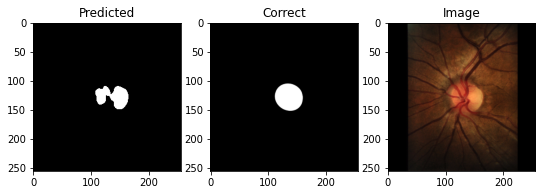

IOU: 0.574853241443634
Dice: 0.7392401242864566
image #73


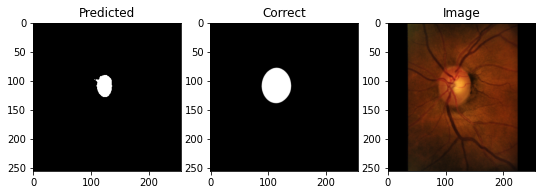

IOU: 0.3340318500995636
Dice: 0.5056853183401809
image #81


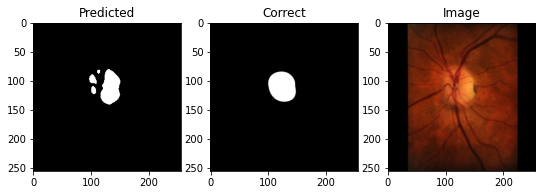

IOU: 0.5756426453590393
Dice: 0.7376741597438089
image #84


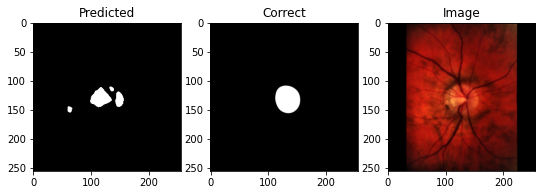

IOU: 0.37825873494148254
Dice: 0.5547270741156487
image #89


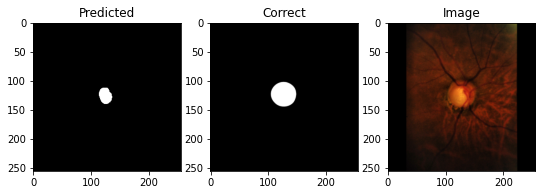

IOU: 0.3379501402378082
Dice: 0.5121665785183986
image #90


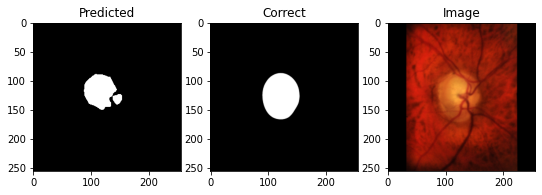

IOU: 0.6097031235694885
Dice: 0.7632282398942392
image #91


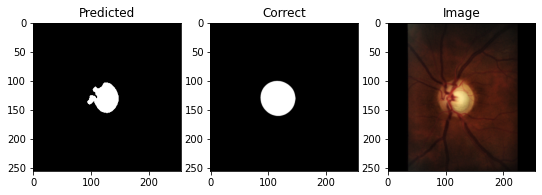

IOU: 0.6316526532173157
Dice: 0.7808252123258759
image #93


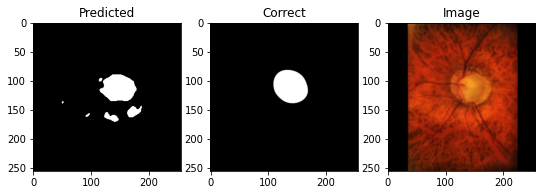

IOU: 0.5381787419319153
Dice: 0.70534461400843
image #94


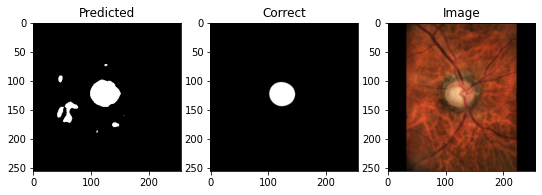

IOU: 0.5758786201477051
Dice: 0.7353317600071753
image #97


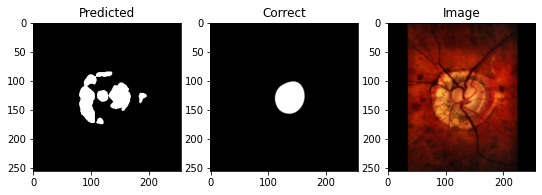

IOU: 0.29843851923942566
Dice: 0.4638293491828017
image #100


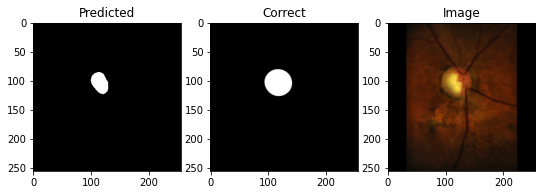

IOU: 0.47610723972320557
Dice: 0.654250549310873
image #103


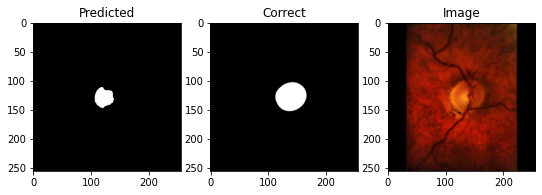

IOU: 0.2757256031036377
Dice: 0.43751083215652026
image #105


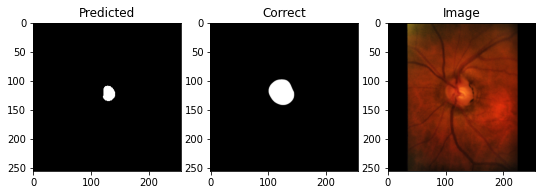

IOU: 0.29459458589553833
Dice: 0.46178028565635415
image #108


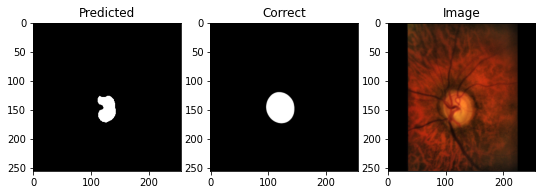

IOU: 0.5369554758071899
Dice: 0.7062806117819819
image #127


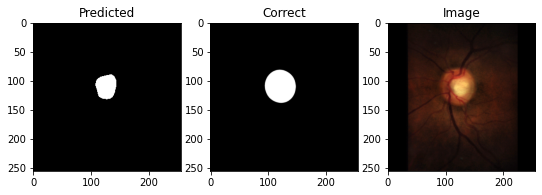

IOU: 0.5071070194244385
Dice: 0.6816251429974548
image #143


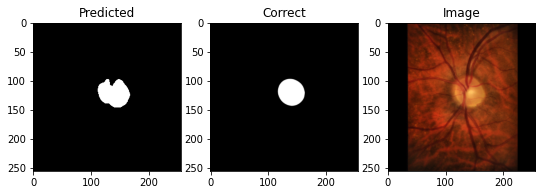

IOU: 0.7506006956100464
Dice: 0.8644166916908261
image #145


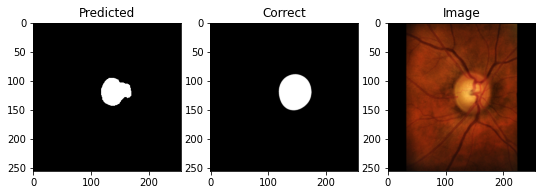

IOU: 0.6336562633514404
Dice: 0.7826482563494728
image #153


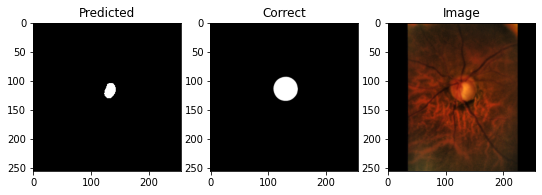

IOU: 0.28718703985214233
Dice: 0.45371558837787046


In [14]:
pred_iou, pred_dice, pred_disc = predict(images, X_valid, Z_valid, model_disc, img_size)

In [15]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.5139144
0.6715100598652164


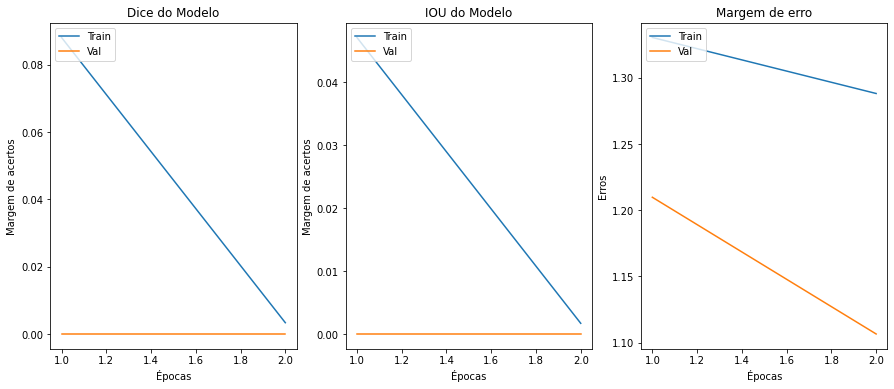

In [17]:
plot_results(history_cup, epochs)

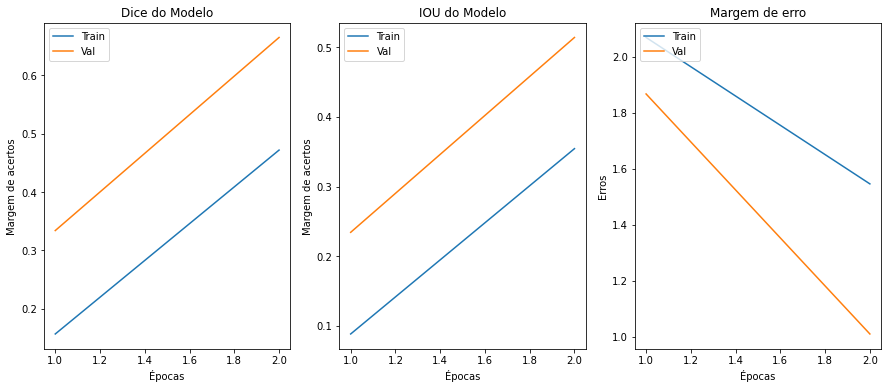

In [19]:
plot_results(history_disc, epochs)

In [20]:
df, diametros = create_table_result(pred_cup, pred_disc, test_idx, 'rgb_red')

IndexError: list index out of range

In [ ]:
print(df)

In [ ]:
print(diametros)